In [61]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
import datetime
import concurrent

from phantasy import fetch_data, caget

In [15]:
from maximize_FC import maximize_FC814, maximize_FC977, maximize_FC998, maximize_FC1102
from pyBO import pyBO
from pyBO.model import GaussianProcess
from pyBO.covfunc import matern52
from pyBO.util import proximal_ordered_init_sampler
from pyBO import Auto

In [64]:
now = str(datetime.datetime.now())
now = now[:now.rfind(':')].replace(' ','_').replace(':',';')

# preprare objective

In [3]:
obj = maximize_FC814(decision_L2reg=0.01)
obj.decision_bounds = np.array([[-2,2],[-2,2]])

In [4]:
obj.prepare_objective()

/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")


 # BO intial training data sampling

In [8]:
obj.x0

array([0.1, 0.1])

In [46]:
x0, _ = fetch_data(obj.decision_CSETs,0.01)
x0

array([-1.05629321,  0.21299251])

In [9]:
n_init = 32

train_x = proximal_ordered_init_sampler(n_init,
                                      bounds=obj.decision_bounds,
                                      x0=obj.x0,
                                      ramping_rate=obj.decision_tols,
                                      polarity_change_time=15
                                     )
train_y = np.zeros(n_init)
for i,x in enumerate(train_x):
    train_y[i] = obj(x) # + 1e-6+np.random.randn()

/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not

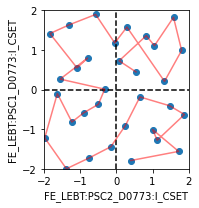

In [55]:
fig,ax = plt.subplots(figsize=(3,3))
ax.plot(train_x[:32,0],train_x[:32,1],alpha=0.5,c='r')
ax.scatter(train_x[:32,0],train_x[:32,1])
ax.hlines(0,obj.decision_bounds[0,0],obj.decision_bounds[0,1],ls='--',color='k');
ax.vlines(0,obj.decision_bounds[1,0],obj.decision_bounds[1,1],ls='--',color='k');
ax.set_xlim(obj.decision_bounds[0,0],obj.decision_bounds[0,1]);
ax.set_ylim(obj.decision_bounds[1,0],obj.decision_bounds[1,1]);
ax.set_xlabel(obj.decision_CSETs[0]);
ax.set_ylabel(obj.decision_CSETs[1]);
fig.tight_layout()
fig.savefig(now+"_FC814_init_samples.png",dpi=180)

In [11]:
model = GaussianProcess(matern52())
bo = pyBO.BO(model=model,
             x=train_x,
             y=train_y,
             bounds=obj.decision_bounds,
             acquisition_func= 'EI',
            )

[████████████████████████████████████████] 100%/100%



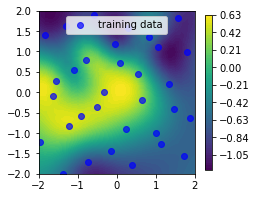

In [12]:
bo.plot_model_2D_projection()

In [16]:
x1 = bo.query_candidates(
                         polarity_penalty=0.1,
                         X_penal = None, 
                         X_favor = None)

executor = concurrent.futures.ThreadPoolExecutor(max_workers=1)
y1_future = executor.submit(obj,x1.flatten())

/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")


In [17]:
x2 = bo.query_candidates(
                         X_current = Auto,
                         x_candidate=x1,
                         y_candidate_future=y1_future,
                         polarity_penalty=0.1,
                         X_penal = Auto, 
                         X_favor = None)

In [18]:
y1 = [y1_future.result()]
y2_future = executor.submit(obj,x2.flatten())
bo.update_model(x1=x1,y1=y1)

/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")


In [19]:
x = x2
y_future = y2_future
# for i in range(32):
for i in range(32-2):
    print(i)
    x,y_future = bo.step(obj, x, y_future, polarity_penalty=Auto, X_penal=Auto, X_favor=None)

/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")
/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not

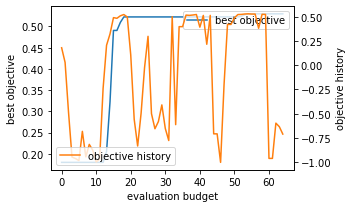

In [66]:
fig,ax = plt.subplots(figsize=(5,3))
bo.plot_obj_history(ax=ax)
fig.tight_layout()
fig.savefig(now+"_FC814_history.png",dpi=180)

In [38]:
best_x,best_y, = bo.best_sofar()
best_x,best_y

(array([-1.05629321,  0.21299251]), array([0.52979415]))

In [23]:
obj(best_x)

/user/hwang/Workspace/ObjFuncs/maximize_FC.py:44: UserWarning: Apertures are not in
  warn("Apertures are not in")


0.5273915265041359

In [32]:
len(bo.history)

34

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%



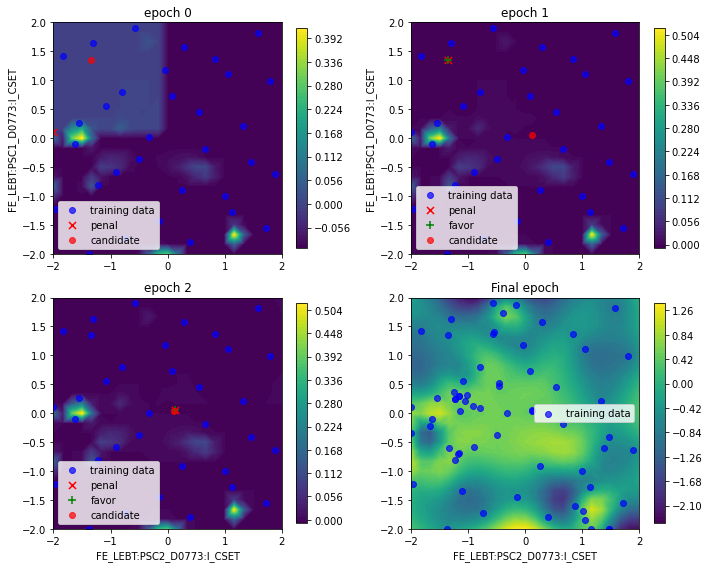

In [60]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
bo.plot_acquisition_2D_projection(epoch=0, fig=fig, ax=ax[0,0])
ax[0,0].set_title('epoch 0');
bo.plot_acquisition_2D_projection(epoch=1, fig=fig, ax=ax[0,1])
ax[0,1].set_title('epoch 1');
bo.plot_acquisition_2D_projection(epoch=2, fig=fig, ax=ax[1,0])
ax[1,0].set_title('epoch 2');
bo.plot_acquisition_2D_projection(epoch=-1, fig=fig, ax=ax[1,1])
ax[1,1].set_title('Final epoch');

ax[1,0].set_xlabel(obj.decision_CSETs[0])
ax[1,1].set_xlabel(obj.decision_CSETs[0])
ax[0,0].set_ylabel(obj.decision_CSETs[1])
ax[0,1].set_ylabel(obj.decision_CSETs[1])

fig.tight_layout()
fig.savefig(now+"_FC814_acquisition.png",dpi=180)

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%

[████████████████████████████████████████] 100%/100%



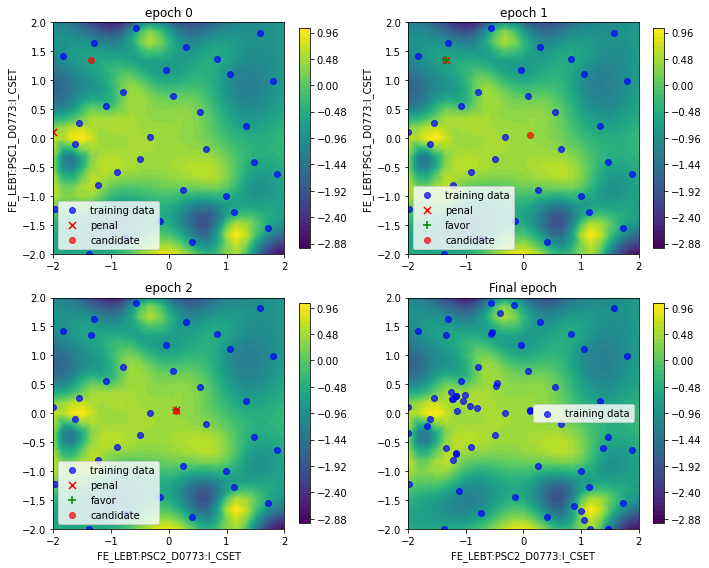

In [50]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
bo.plot_model_2D_projection(epoch=0, fig=fig, ax=ax[0,0])
ax[0,0].set_title('epoch 0');
bo.plot_model_2D_projection(epoch=1, fig=fig, ax=ax[0,1])
ax[0,1].set_title('epoch 1');
bo.plot_model_2D_projection(epoch=2, fig=fig, ax=ax[1,0])
ax[1,0].set_title('epoch 2');
bo.plot_model_2D_projection(epoch=-1, fig=fig, ax=ax[1,1])
ax[1,1].set_title('Final epoch');

ax[1,0].set_xlabel(obj.decision_CSETs[0])
ax[1,1].set_xlabel(obj.decision_CSETs[0])
ax[0,0].set_ylabel(obj.decision_CSETs[1])
ax[0,1].set_ylabel(obj.decision_CSETs[1])

fig.tight_layout()
fig.savefig(now+"_FC814_mean_model.png",dpi=180)

In [39]:
best_x, best_y

(array([-1.05629321,  0.21299251]), array([0.52979415]))